# Example notebook for SSH Variability application

This notebook demonstrates how the SSH variability application works when the script is run. We first start by loading some of the modules, going up two levels so that we can import the `ssh` module

In [1]:
import sys
sys.path.insert(0, '../../')
from ssh import sshVariability


Please make sure that your config file is updated with the path to the output folder where the outputs of this notebook should be saved. In this code, if the output_directory key is not found in the config file, the output_directory variable will be set to a directory named 'output' in the current working directory (os.getcwd()).

The following cell executes the 'ssh_class.py' script with sshVariability class. The script performs the following: 

1. Reads and parses the configuration file (`config.yml`) to retrieve the necessary parameters and settings for the script's execution. Please make sure that the config file is updated with the information you would like to analyze.

2. Within the `sshVariability` class, defines methods to retrieve, process, and analyze the SSH data for each model starting with AVISO observational data.

3. Saved the std computation under outputs along with visualization based on the target grid defined in the config file. AQUA regridder capability is used to regrid the data and visualize the results in subplots.

4. Difference plot between the model data and the AVISO data is plotted in subplots

2024-04-26 17:13:19 :: ssh_logger :: INFO     -> Dask Dashboard URL: http://127.0.0.1:8787/status
2024-04-26 17:13:19 :: ssh_logger :: INFO     -> Workers=8, Memory=223.52 GiB
2024-04-26 17:13:19 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-04-26 17:13:19 :: Reader :: WARNING  -> The requested default fixer name AVISO-default does not exist in fixes files
2024-04-26 17:13:19 :: Reader :: WARNING  -> No fixes available for model AVISO, experiment ssh-L4, source daily
2024-04-26 17:13:23 :: ssh_logger :: INFO     -> aviso data already exists from 1993-01-01 to 2022-06-23 
2024-04-26 17:13:27 :: ssh_logger :: INFO     -> Now loading data for other models to compare against AVISO ssh variability
2024-04-26 17:13:27 :: ssh_logger :: INFO     -> initializing AQUA reader to read the model inputs for {'name': 'ICON', 'experiment': 'ssp370', 'source': 'daily-hpz10-oce2d', 'regrid': 'r

FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)


2024-04-26 17:14:53 :: ssh_logger :: INFO     -> ICON data spans from 2020-01-01T00:00:00.000000000 to 2030-08-30T00:00:00.000000000
2024-04-26 17:14:53 :: ssh_logger :: INFO     -> Getting SSH data complete for ICON, now computing standard deviation on the default timestamp
2024-04-26 17:14:53 :: ssh_logger :: DEBUG    -> start_date: 2020-01-20 00:00:00
2024-04-26 17:14:53 :: ssh_logger :: DEBUG    -> end_date: 2020-05-30 00:00:00
2024-04-26 17:14:53 :: ssh_logger :: DEBUG    -> time_min: 2020-01-01 00:00:00
2024-04-26 17:14:53 :: ssh_logger :: DEBUG    -> time_max: 2030-08-30 00:00:00
2024-04-26 17:14:53 :: ssh_logger :: INFO     -> computation complete, saving output file


FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /flash/project_465000454/dte/fdb/root  (No such file or directory)
FDB root /fl

/opt/conda/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
2024-04-26 17:15:38 :: ssh_logger :: INFO     -> output saved, now regridding using the aqua regridder
2024-04-26 17:15:40 :: ssh_logger :: INFO     -> visualizing the data in subplots
2024-04-26 17:15:56 :: ssh_logger :: INFO     -> Saving plots as a PDF output file
2024-04-26 17:16:02 :: ssh_logger :: INFO     -> visualizing the selected region data and saving plots
/opt/conda/lib/python3.11/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 14.10 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 14.10 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/opt/conda/lib/python3.11/s

CPU times: user 49.1 s, sys: 1min 23s, total: 2min 13s
Wall time: 3min 9s


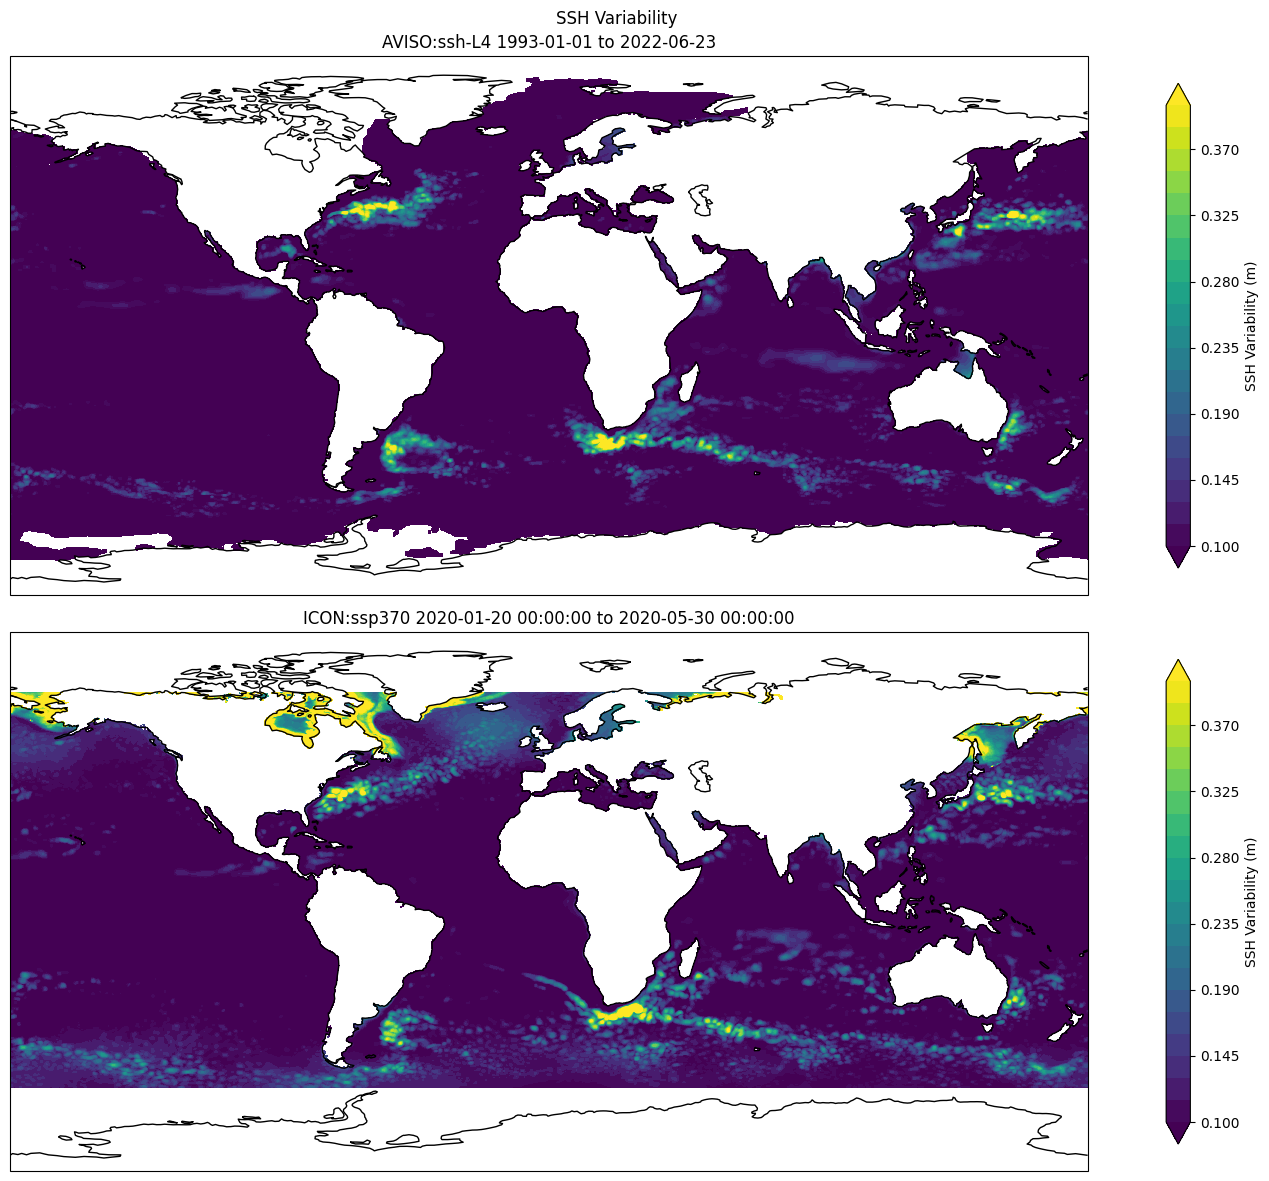

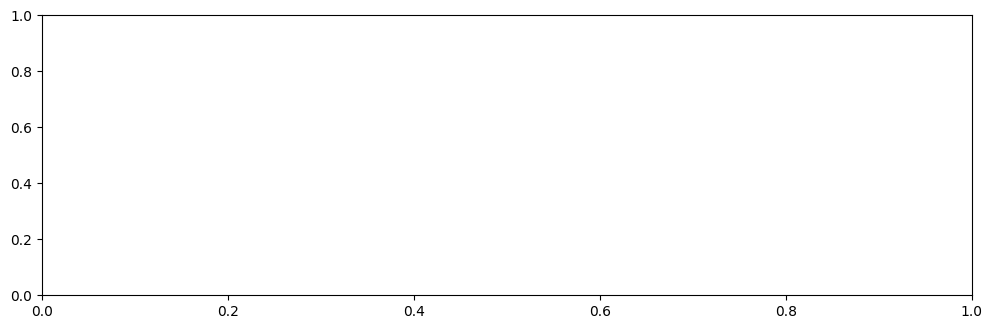

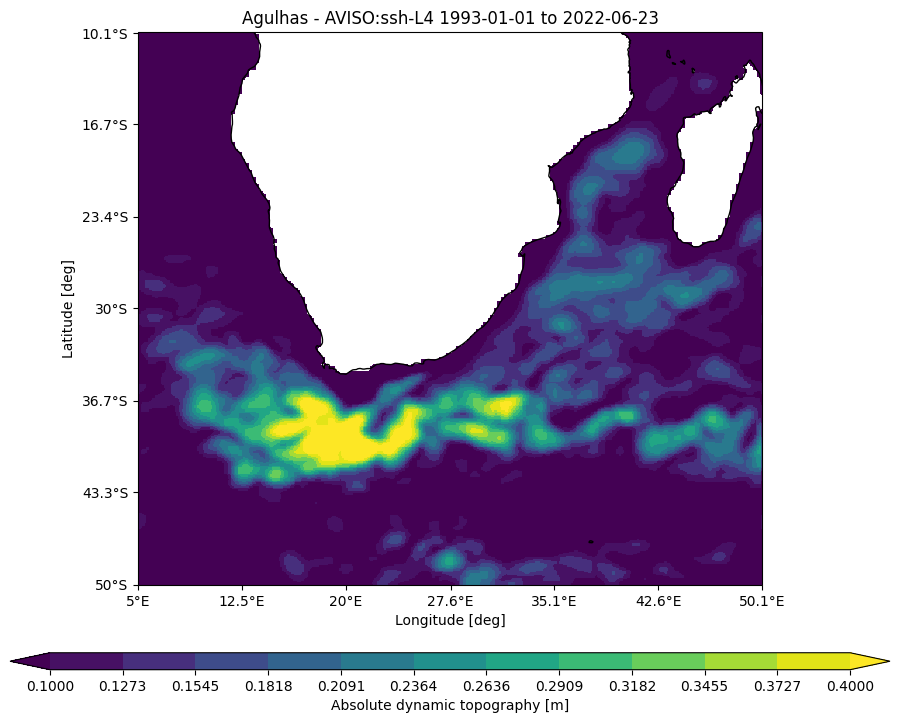

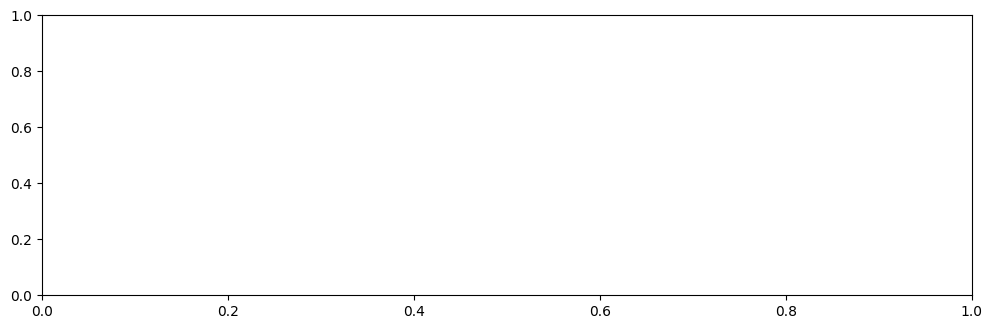

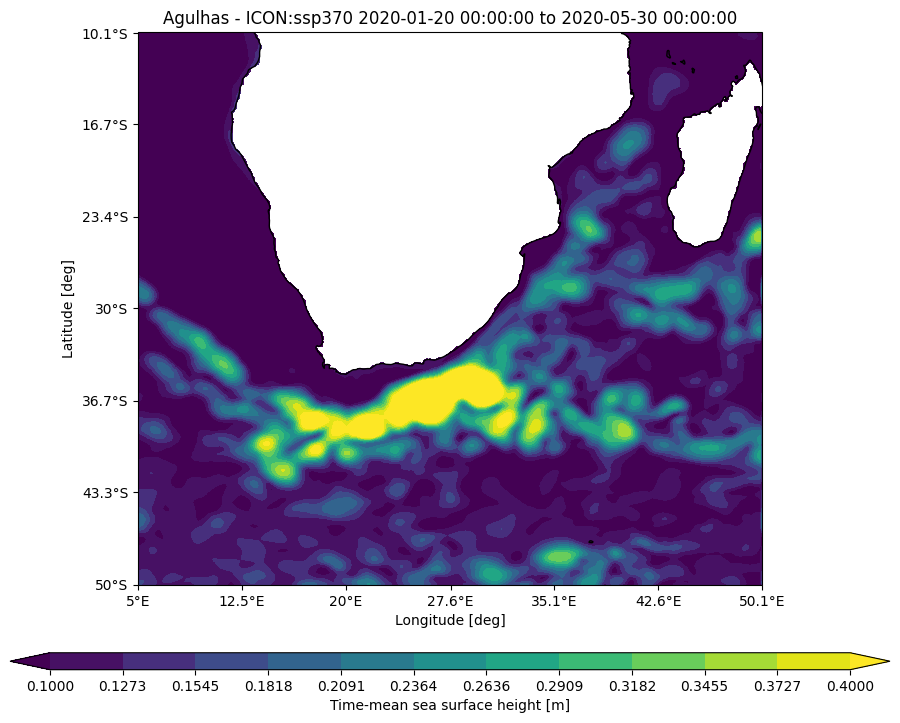

In [2]:
%%time
analyzer = sshVariability('../config.yaml')
analyzer.run()
# runtime is around 10-15 min depending on how much data you wish to analyse.

Double-Checking the output files. The cells below are just checking if the output files contain the right data.

The subfolders "NetCDF" and "PDF" are automatically created under your defined "Output" folder. This is where individual outputs will get saved. Note: NetCDF files that get saved are ungridded as they get saved before AQUA regridder is used.

In [5]:
import xarray as xr

In [7]:
# Specify the path to the NetCDF file output
file_path = '../output/netcdf/AVISO_ssh-L4_daily_std.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset> Size: 8MB
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    adt        (latitude, longitude) float64 8MB ...